In [204]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

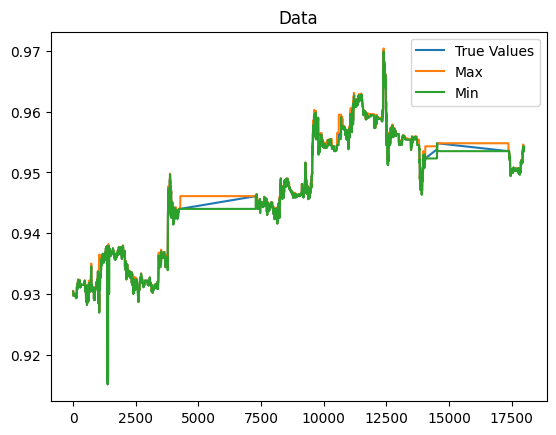

In [205]:
# load Data
data = np.load("avgs.npy")
maxs = np.load("maxs.npy")
mins = np.load("mins.npy")
data = data[:20000]


plt.plot(data[:17995], label='True Values')
plt.plot(maxs[:17995],label='Max')
plt.plot(mins[:17995],label='Min')
plt.title("Data")
plt.legend()
plt.show()


# Convert the data into features (X) and target (y)
# We will use the previous 3 time steps to predict the next time step

def create_features(data, window_size=3):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])  # Use the previous `window_size` points as features
        y.append(data[i + window_size])  # Predict the value at the next time step
    return np.array(X), np.array(y)

window_size = 5
X, y = create_features(data, window_size)

# Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

X_train, X_test, y_train, y_test = X[:17995], X[17995:], y[:17995], y[17995:]

In [206]:
# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.546387788930862e-08


2000


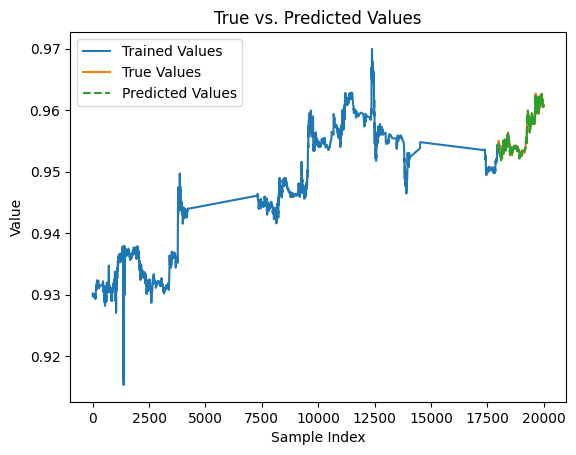

In [215]:
print(len(y_test))
plt.plot(y_train,label="Trained Values")
plt.plot(np.arange(17995,19995),y_test, label='True Values')
plt.plot(np.arange(17995,19995),y_pred, label='Predicted Values', linestyle='--')
# plt.plot(maxs[17995:],label='Max')
# plt.plot(mins[17995:],label='Min')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('True vs. Predicted Values')
plt.show()

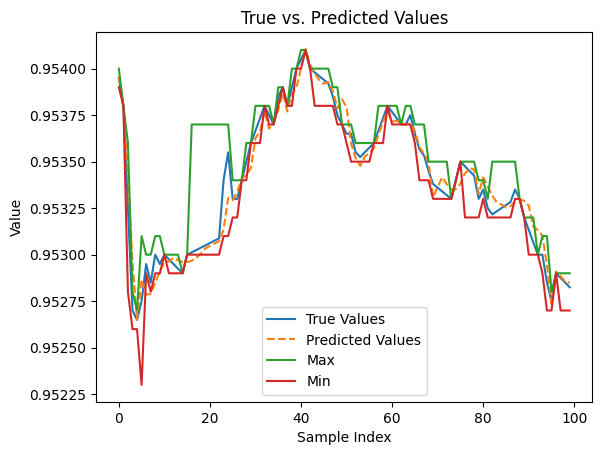

0.61


In [217]:
plt.plot(y_test[500:600], label='True Values')
plt.plot(y_pred[501:601], label='Predicted Values', linestyle='--')
plt.plot(maxs[17995+505:17995+605],label='Max')
plt.plot(mins[17995+505:17995+605],label='Min')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('True vs. Predicted Values')
plt.show()

upper = y_pred[501:601] < maxs[17995+505:17995+605]
lower = y_pred[501:601] > mins[17995+505:17995+605]

print(sum(upper*lower)/100)


In [224]:
upper = y_pred <= maxs[17995+4:17995+2004]
lower = y_pred >= mins[17995+4:17995+2004]

print(sum(upper*lower)/2000)

0.518


# ***Normalization***

In [187]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [188]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best n_neighbors: {grid_search.best_params_["n_neighbors"]}')

Best n_neighbors: 9


In [189]:
# Initialize the KNN regressor
# knn = KNeighborsRegressor(n_neighbors=grid_search.best_params_["n_neighbors"])
knn = KNeighborsRegressor(n_neighbors=10)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 5.960467199302651e-08


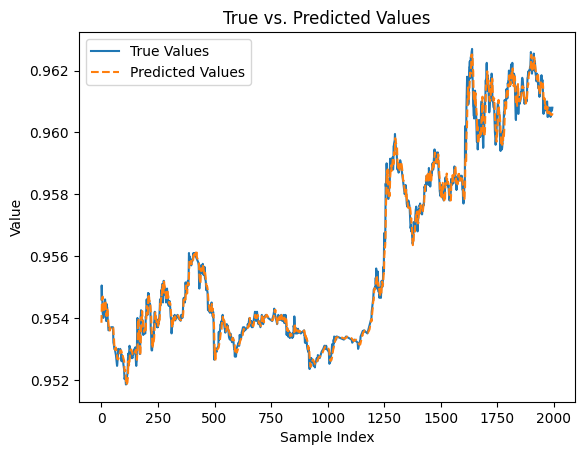

In [144]:
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values', linestyle='--')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('True vs. Predicted Values')
plt.show()

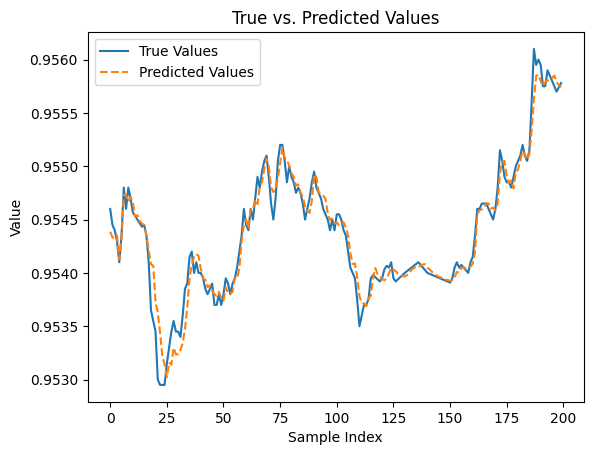

In [190]:
plt.plot(y_test[200:400], label='True Values')
plt.plot(y_pred[201:401], label='Predicted Values', linestyle='--')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('True vs. Predicted Values')
plt.show()

# ***Further Prediction***

In [192]:
res = list(y_pred[200:400].copy())

for i in range(300):

  window_size = 10
  X_p, y_p = create_features(res[-11:], window_size)

  # Make predictions on the test set
  y_prediction = knn.predict(X_p)

  # get the next prediction
  res.append(y_prediction[-1])

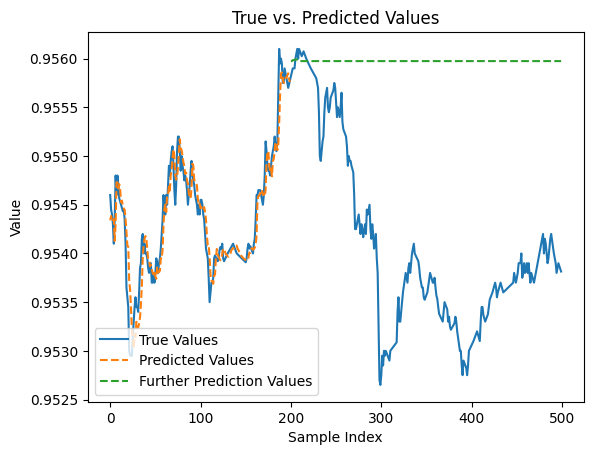

In [193]:
plt.plot(y_test[200:700], label='True Values')
plt.plot(y_pred[200:400], label='Predicted Values', linestyle='--')
plt.plot(np.arange(200,500),res[200:], label="Further Prediction Values", linestyle='--')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('True vs. Predicted Values')
plt.show()